### 1. RNN

- 시퀀스 데이터: "순서"에 의미가 있는 데이터. 순서가 바뀌면 의미도 바뀌게 됨
    - 시계열 데이터도 순차 데이터

- 다른 정형 데이터와의 차이점
    - 행의 순서가 핵심이고 종속적임.
    - 그렇기에 이전 시점의 정보가 다음 데이터에 영향을 미침

- 구조&원리
    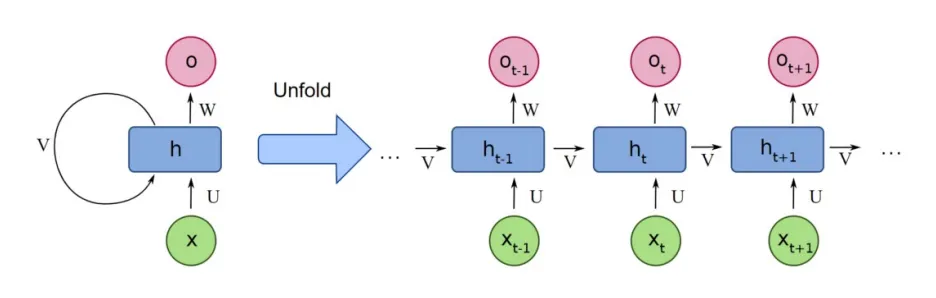
    1. t-1에서 계산된 h_t-1이 t시점으로 전달
    2. x_t & h_t-1을 함께 계산해서 현재의 h_t를 업데이트한다
        - 입력 가중치 U(x_t -> h_t), 순환 가중치 V(h_t-1 -> h_t)
    3. 이떄, o_t도 출력한다.
        - 출력 가중치 W(h_t -> o_t)
    4. t+1 시점에게 정보를 전달한다

- 아키텍처
    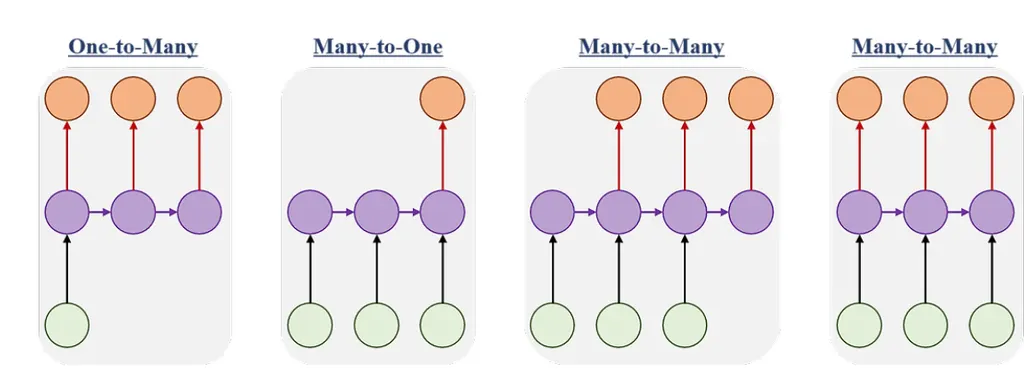
    1. One to One
    2. One to Many
    3. Many to One
    4. Many to Many
    5. Many to Many

- 가중치 공유
    - U, W, bias 등의 가중치를 각 t마다 동일하게 세팅

    - 장점
    1. 학습 파라미터 수 감소
        - 모델 경량화
    2. 일반화 능력 향상
        - 그런데 정확도가 떨어질 수도 있는거 아닌감?

- 한계
    - 구조 특성 상 전체 시퀀스를 읽고 역전파가 이루어짐  
        - 가중치 소실(장기 의존성) or 폭발이 일어날 수 있음
            - 기울기 폭발은 Gradient Clipping으로 해결 가능.(기울기의 상한선 정하기)
        - 훈련 시간이 느림
            - "시퀀스"데이터를 다루기 때문에 병렬 처리 불가
            

### 2. LSTM

1. Forget gate
    - h_t-1 & x_t를 통과시켜 f_t를 c_t-1에 보낸다
    - 새로 들어오는 정보를 바탕으로 기존의 정보를 얼마나 잊을지 판단
    - 기존의 c_t-1로부터 어떤 값을 잊을지 판단
2. Input gate
    - 새로 들어오는 정보 중 어떤 걸 저장할지 판단, sigmoid 이용
    - tanh layer가 새로운 후보값 벡터를 만듦
3. Final memory cell
    - 이전 값을 얼마나 잊을지 (f), 이번에 들어온 값을 얼마나 기억할지 (C_t벡터)를 구하고, 이 둘을 더 해 cell state를 업데이트한다
4. Output gate
    - 다음 층으로 전달하는 hidden state를 만든다

- 장점
    - 기울기 소실 문제를 효과적으로 해결.
    - 잊을 정보와 기억할 정보를 나눠서 관리해나간다.
- 단점
    - 구조가 복잡하고, 학습 파라미터가 많아진다

### 3. GRU

- LSTM에서 조금 더 발전, 메모리 셀 없이 구조를 간단하게 만듦
- Forgetgate & Input gate를 Undate gate 하나로 합침
- Resetgate 사용
-> gate 수가 줄어들어 비용 줄고 성능은 LSTM과 유사하거나 더 좋음

- new hidden state
    - LSTM에서 f,i를 하나의 게이트 (1-z),z로 사용한다
    - 즉, z를 조절해서 양자택일하도록 하나의 수식으로 계산한다
- update gate
    - 이전 상태와 현재 상태를 어느 정도의 비율로 반영할지 계산
- reset gate
    - 이전 상태를 어느 정도 반영할지 계산

- 성능 & 효율성 두 마리의 토끼를 잡았지만, 긴 시퀀스 처리에는 아직 한계가 있다

LSTM
- 시퀀스가 길 때
- 데이터의 양이 충분, 패턴이 복잡할 때
- 모델 성능이 중요할 때
- 기계번역, 언어 모델링, 장기 시계열 예측

GRU
- 자원이 한정적, 속도가 중요한 경우
- 데이터 양이 적고, 과적합 위험이 있는 경우
- 실시간 예측
- 음성인식, 스트리밍 데이터, 실시간 비디오 분석

### 4. Seq2Seq

- 인코더 -> 컨텍스트 벡터 (크기 고정) -> 디코더

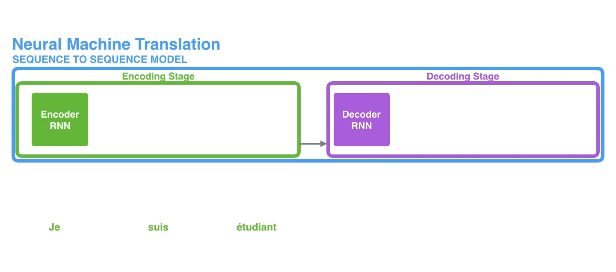

- 컨텍스트 벡터의 크기가 고정되기 때문에 병목현상이 발생하고, 기울기 소실 문제, 병렬화 불가능 문제도 발생한다.